In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob

#remove warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# call all street crime csv files in the directory/sub-folder
other_cities = glob('C:/Users/User/other_cities_2018_2021/*.csv')

# combine all csv files
other_cities_list = []
for filename in sorted(other_cities):
    other_cities_list.append(pd.read_csv(filename))

other_cities_all = pd.concat(other_cities_list)

# export combined data to csv
other_cities_all.to_csv('C:/Users/User/other_cities_all.csv', index=False)

In [3]:
# read and display the first and last five rows of the new data set
other_cities_all = pd.read_csv('other_cities_all.csv')
other_cities_all

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,4b89599348c51bcc80abf2fab1e55537b9f5473e9cd654...,2018-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,0.489518,51.560445,On or near Whytewaters,E01021311,Basildon 022C,Other crime,Investigation complete; no suspect identified,NaN
1,NaN,2018-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.516919,51.423683,On or near A4175,E01014399,Bath and North East Somerset 001A,Anti-social behaviour,NaN,NaN
2,74128ab275c1aa107d67cd59d1d3210bd9fdc976e0c2c6...,2018-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.515072,51.419357,On or near Stockwood Hill,E01014399,Bath and North East Somerset 001A,Burglary,Status update unavailable,NaN
3,0417b3f4363b480f4d4c2a826be8cd4a957fffb818873e...,2018-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.515816,51.408717,On or near Caroline Close,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Further investigation is not in the public int...,NaN
4,0a404693ae14efee16186c98d4e63d5f2d1fc29d5efb1e...,2018-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.494870,51.422276,On or near Conference/Exhibition Centre,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Offender given a caution,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3184835,5cc96d006282ce91e64e38ecd133e7766520ec582b40ec...,2021-09,West Yorkshire Police,West Yorkshire Police,NaN,NaN,No Location,NaN,NaN,Other crime,Under investigation,NaN
3184836,ecb5c45c00b796d5e665b87d3a33176aaedbc687ebd478...,2021-09,West Yorkshire Police,West Yorkshire Police,NaN,NaN,No Location,NaN,NaN,Other crime,Under investigation,NaN
3184837,8fc9bbc2d3b9fdd906a925f8be46ce37e2339ae61971c0...,2021-09,West Yorkshire Police,West Yorkshire Police,NaN,NaN,No Location,NaN,NaN,Other crime,Under investigation,NaN
3184838,56ade0794a287782414f6f9285753493ae97754384ed9a...,2021-09,West Yorkshire Police,West Yorkshire Police,NaN,NaN,No Location,NaN,NaN,Other crime,Under investigation,NaN


In [4]:
# display more details about the data
print("\nData Information:")
other_cities_all.info()


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3184840 entries, 0 to 3184839
Data columns (total 12 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Crime ID               object 
 1   Month                  object 
 2   Reported by            object 
 3   Falls within           object 
 4   Longitude              float64
 5   Latitude               float64
 6   Location               object 
 7   LSOA code              object 
 8   LSOA name              object 
 9   Crime type             object 
 10  Last outcome category  object 
 11  Context                float64
dtypes: float64(3), object(9)
memory usage: 291.6+ MB


In [5]:
# convert columns to similar case
other_cities_all.columns = map(str.lower, other_cities_all.columns)

### Dealing with Duplicates and Null Values

In [6]:
x = other_cities_all['crime id'].value_counts().loc[lambda x : x>1]
y = x.count()
y

9218

In [7]:
other_cities_all = other_cities_all.drop_duplicates(subset=['crime id'])

In [8]:
other_cities_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2597318 entries, 0 to 3184839
Data columns (total 12 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   crime id               object 
 1   month                  object 
 2   reported by            object 
 3   falls within           object 
 4   longitude              float64
 5   latitude               float64
 6   location               object 
 7   lsoa code              object 
 8   lsoa name              object 
 9   crime type             object 
 10  last outcome category  object 
 11  context                float64
dtypes: float64(3), object(9)
memory usage: 257.6+ MB


In [9]:
#check for null values in dataset
other_cities_all.isna().sum()

crime id                       1
month                          0
reported by                    0
falls within                   0
longitude                 111806
latitude                  111806
location                       0
lsoa code                 111806
lsoa name                 111806
crime type                     0
last outcome category          1
context                  2597318
dtype: int64

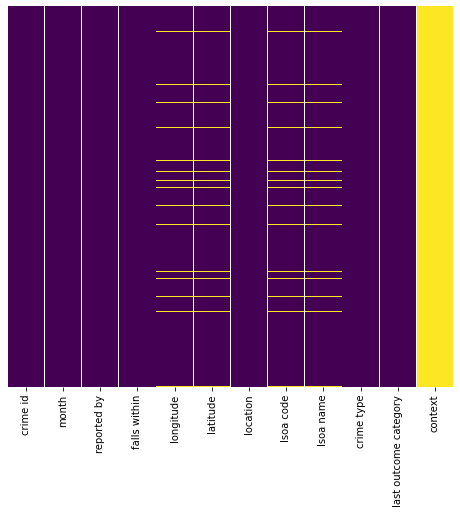

<Figure size 432x288 with 0 Axes>

In [10]:
#visualise the null values
plt.figure(figsize = (8,7))
sns.heatmap(other_cities_all.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()
plt.savefig('Missing Values')

In [11]:
# drop context column
other_cities_all.drop('context', inplace=True, axis=1)

In [12]:
# fill in nulls
other_cities_all['last outcome category'] = other_cities_all['last outcome category'].fillna("Other not Known")

In [13]:
# drop remaining nulls that cannot be filled in i.e., latitude, longitude
other_cities_all.dropna(inplace=True)

In [14]:
# re-check for null values in dataset
other_cities_all.isna().sum()

crime id                 0
month                    0
reported by              0
falls within             0
longitude                0
latitude                 0
location                 0
lsoa code                0
lsoa name                0
crime type               0
last outcome category    0
dtype: int64

In [15]:
# drop unrelated columns - Falls within, and Context
other_cities_all.drop(['crime id', 'falls within'],axis=1, inplace=True)
other_cities_all.head(3)

,month,reported by,longitude,latitude,location,lsoa code,lsoa name,crime type,last outcome category
0,2018-01,Avon and Somerset Constabulary,0.489518,51.560445,On or near Whytewaters,E01021311,Basildon 022C,Other crime,Investigation complete; no suspect identified
2,2018-01,Avon and Somerset Constabulary,-2.515072,51.419357,On or near Stockwood Hill,E01014399,Bath and North East Somerset 001A,Burglary,Status update unavailable
3,2018-01,Avon and Somerset Constabulary,-2.515816,51.408717,On or near Caroline Close,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Further investigation is not in the public int...


In [16]:
# remove last 5 characters from LSOA name values
other_cities_all['lsoa name'] = other_cities_all['lsoa name'].str[:-5]

# show first 3 rows after removing the last 5 characters from LSOA name
other_cities_all.head(3)

,month,reported by,longitude,latitude,location,lsoa code,lsoa name,crime type,last outcome category
0,2018-01,Avon and Somerset Constabulary,0.489518,51.560445,On or near Whytewaters,E01021311,Basildon,Other crime,Investigation complete; no suspect identified
2,2018-01,Avon and Somerset Constabulary,-2.515072,51.419357,On or near Stockwood Hill,E01014399,Bath and North East Somerset,Burglary,Status update unavailable
3,2018-01,Avon and Somerset Constabulary,-2.515816,51.408717,On or near Caroline Close,E01014399,Bath and North East Somerset,Criminal damage and arson,Further investigation is not in the public int...


In [17]:
# remove first character from LSOA code values so only integer values remain
other_cities_all['lsoa code'] = other_cities_all['lsoa code'].str[1:]

# show first 3 rows after removing the first character from LSOA code
other_cities_all.head(3)

,month,reported by,longitude,latitude,location,lsoa code,lsoa name,crime type,last outcome category
0,2018-01,Avon and Somerset Constabulary,0.489518,51.560445,On or near Whytewaters,01021311,Basildon,Other crime,Investigation complete; no suspect identified
2,2018-01,Avon and Somerset Constabulary,-2.515072,51.419357,On or near Stockwood Hill,01014399,Bath and North East Somerset,Burglary,Status update unavailable
3,2018-01,Avon and Somerset Constabulary,-2.515816,51.408717,On or near Caroline Close,01014399,Bath and North East Somerset,Criminal damage and arson,Further investigation is not in the public int...


In [18]:
# display count by LSOA code
x = other_cities_all['lsoa code'].value_counts().sort_index(ascending=True).sort_values(ascending=False)
y = other_cities_all['lsoa code'].value_counts().count()

print(x)
print('\n')
print("There are are {} categories ".format(y))

01033010    22284
01033760    11705
01033756    11559
01033690    10346
01010994    10271
            ...  
01021598        1
01021417        1
01021311        1
01021243        1
01000115        1
Name: lsoa code, Length: 5248, dtype: int64


There are are 5248 categories 


In [19]:
# display count by LSOA name
x = other_cities_all['lsoa name'].value_counts().sort_index(ascending=True).sort_values(ascending=False)
y = other_cities_all['lsoa name'].value_counts().count()

print(x)
print('\n')
print("There are are {} categories ".format(y))

Leeds                     366495
Bradford                  261950
Liverpool                 223188
Sheffield                 194924
Bristol                   173978
                           ...  
Hastings                       1
Southend-on-Sea                1
South Staffordshire            1
South Northamptonshire         1
Adur                           1
Name: lsoa name, Length: 275, dtype: int64


There are are 275 categories 


In [20]:
# extract only related cities - Leeds, Bradford, Liverpool, Sheffield and Bristol

leeds_data = other_cities_all[other_cities_all['lsoa name'] == 'Leeds']
leeds_data.to_csv('leeds.csv')

In [21]:
bradford_data = other_cities_all[other_cities_all['lsoa name'] == 'Bradford']
bradford_data.to_csv('bradford.csv')

In [22]:
liverpool_data = other_cities_all[other_cities_all['lsoa name'] == 'Liverpool']
liverpool_data.to_csv('liverpool.csv')

In [23]:
sheffield_data = other_cities_all[other_cities_all['lsoa name'] == 'Sheffield']
sheffield_data.to_csv('sheffield.csv')

In [24]:
bristol_data = other_cities_all[other_cities_all['lsoa name'] == 'Bristol']
bristol_data.to_csv('bristol.csv')

In [25]:
# merge all related cities 
c1 = pd.read_csv(r"C:\Users\User\five_cities\leeds.csv")
c2 = pd.read_csv(r"C:\Users\User\five_cities\bradford.csv")
c3 = pd.read_csv(r"C:\Users\User\five_cities\liverpool.csv")
c4 = pd.read_csv(r"C:\Users\User\five_cities\sheffield.csv")
c5 = pd.read_csv(r"C:\Users\User\five_cities\bristol.csv")


five_cities = pd.concat([c1, c2, c3, c4, c5])
five_cities.to_csv('five_cities.csv', index=False)

In [26]:
# read and display first 3 rows of the dataset
five_cities = pd.read_csv('five_cities.csv')
five_cities.head(3)

,Unnamed: 0,month,reported by,longitude,latitude,location,lsoa code,lsoa name,crime type,last outcome category
0,54018,2018-01,West Yorkshire Police,-1.388671,53.935321,On or near Coxwold View,1011698,Leeds,Criminal damage and arson,Investigation complete; no suspect identified
1,54019,2018-01,West Yorkshire Police,-1.391328,53.938003,On or near Supermarket,1011698,Leeds,Shoplifting,Investigation complete; no suspect identified
2,54020,2018-01,West Yorkshire Police,-1.388828,53.936031,On or near Coxwold Hill,1011698,Leeds,Vehicle crime,Investigation complete; no suspect identified


In [27]:
# display count by LSOA name
x = five_cities['lsoa name'].value_counts().sort_index(ascending=True).sort_values(ascending=False)
y = five_cities['lsoa name'].value_counts().count()

print(x)
print('\n')
print("There are are {} categories ".format(y))

Leeds        366495
Bradford     261950
Liverpool    223188
Sheffield    194924
Bristol      173978
Name: lsoa name, dtype: int64


There are are 5 categories 


In [29]:
# drop Unnamed column
five_cities.drop('Unnamed: 0', inplace=True, axis=1)

five_cities.to_csv('five_cities_2.csv')

In [31]:
five_cities.head()

,month,reported by,longitude,latitude,location,lsoa code,lsoa name,crime type,last outcome category
0,2018-01,West Yorkshire Police,-1.388671,53.935321,On or near Coxwold View,1011698,Leeds,Criminal damage and arson,Investigation complete; no suspect identified
1,2018-01,West Yorkshire Police,-1.391328,53.938003,On or near Supermarket,1011698,Leeds,Shoplifting,Investigation complete; no suspect identified
2,2018-01,West Yorkshire Police,-1.388828,53.936031,On or near Coxwold Hill,1011698,Leeds,Vehicle crime,Investigation complete; no suspect identified
3,2018-01,West Yorkshire Police,-1.391328,53.938003,On or near Supermarket,1011698,Leeds,Violence and sexual offences,Unable to prosecute suspect
4,2018-01,West Yorkshire Police,-1.389567,53.938615,On or near Ainsty Crescent,1011698,Leeds,Violence and sexual offences,Offender given community sentence


### Understand the Categorical Columns

In [51]:
#ensure all data is displayed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#check different location types reported
x = five_cities['location'].value_counts()
y = five_cities['location'].value_counts().count()

print(x)
print('\n')
print("There are are {} categories ".format(y))

On or near Supermarket                            35789
On or near Parking Area                           26276
On or near Shopping Area                          25405
On or near Petrol Station                         17042
On or near Sports/Recreation Area                 14901
On or near Pedestrian Subway                      12324
On or near Nightclub                              11707
On or near Hospital                                8256
On or near Further/Higher Educational Building     3996
On or near Park/Open Space                         3401
On or near Theatre/Concert Hall                    3218
On or near Bus/Coach Station                       3031
On or near Police Station                          2743
On or near High Street                             2272
On or near Adelaide Street                         2172
On or near Prison                                  1959
On or near Conference/Exhibition Centre            1855
On or near Heathcroft Rise                      

In [33]:
#check different crime types reported
x = five_cities['crime type'].value_counts()
y = five_cities['crime type'].value_counts().count()

print(x)
print('\n')
print("There are are {} categories ".format(y))

Violence and sexual offences    463991
Public order                    139385
Criminal damage and arson       129031
Other theft                      94682
Vehicle crime                    92373
Burglary                         91292
Shoplifting                      70628
Drugs                            49485
Other crime                      28174
Theft from the person            18043
Bicycle theft                    16658
Robbery                          16012
Possession of weapons            10781
Name: crime type, dtype: int64


There are are 13 categories 


In [34]:
#check different outcome types 
x = five_cities['last outcome category'].value_counts()
y = five_cities['last outcome category'].value_counts().count()

print(x)
print('\n')
print("There are are {} categories ".format(y))

Investigation complete; no suspect identified          446329
Unable to prosecute suspect                            445888
Status update unavailable                              135133
Court result unavailable                                64817
Under investigation                                     24285
Local resolution                                        24043
Awaiting court outcome                                  13094
Further investigation is not in the public interest     11781
Offender given a caution                                11653
Action to be taken by another organisation               7703
Further action is not in the public interest             6653
Formal action is not in the public interest              6131
Offender given a drugs possession warning                4809
Offender sent to prison                                  3964
Offender given community sentence                        3451
Defendant found not guilty                               2081
Offender

### Categorical Columns Viz

In [35]:
five_cities.columns

Index(['month', 'reported by', 'longitude', 'latitude', 'location',
       'lsoa code', 'lsoa name', 'crime type', 'last outcome category'],
      dtype='object')

In [36]:
columns_cat = ["reported by", "lsoa name"]

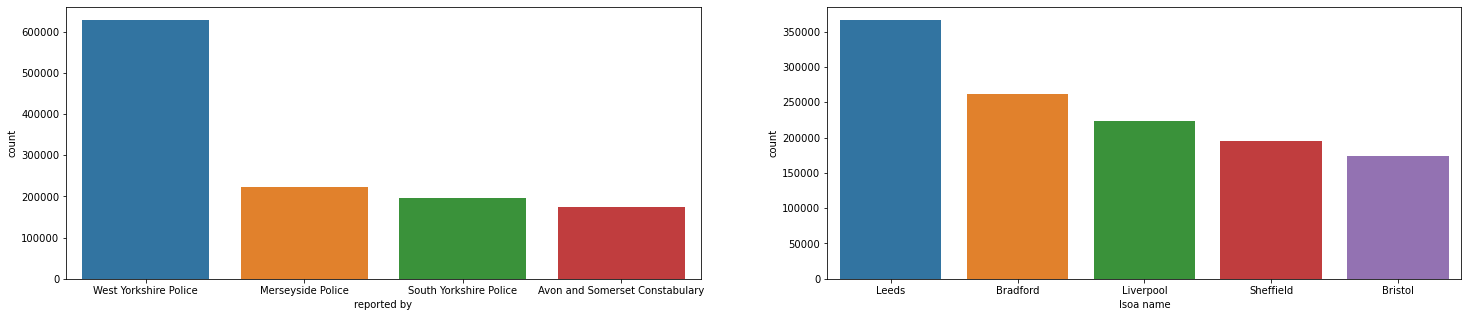

In [37]:
fig, axs = plt.subplots(1, len(columns_cat), figsize=(25,5))
for i, col in enumerate(columns_cat):
    sns.countplot(x=five_cities[col], ax=axs[i], order=five_cities[col].value_counts().index)
plt.show()

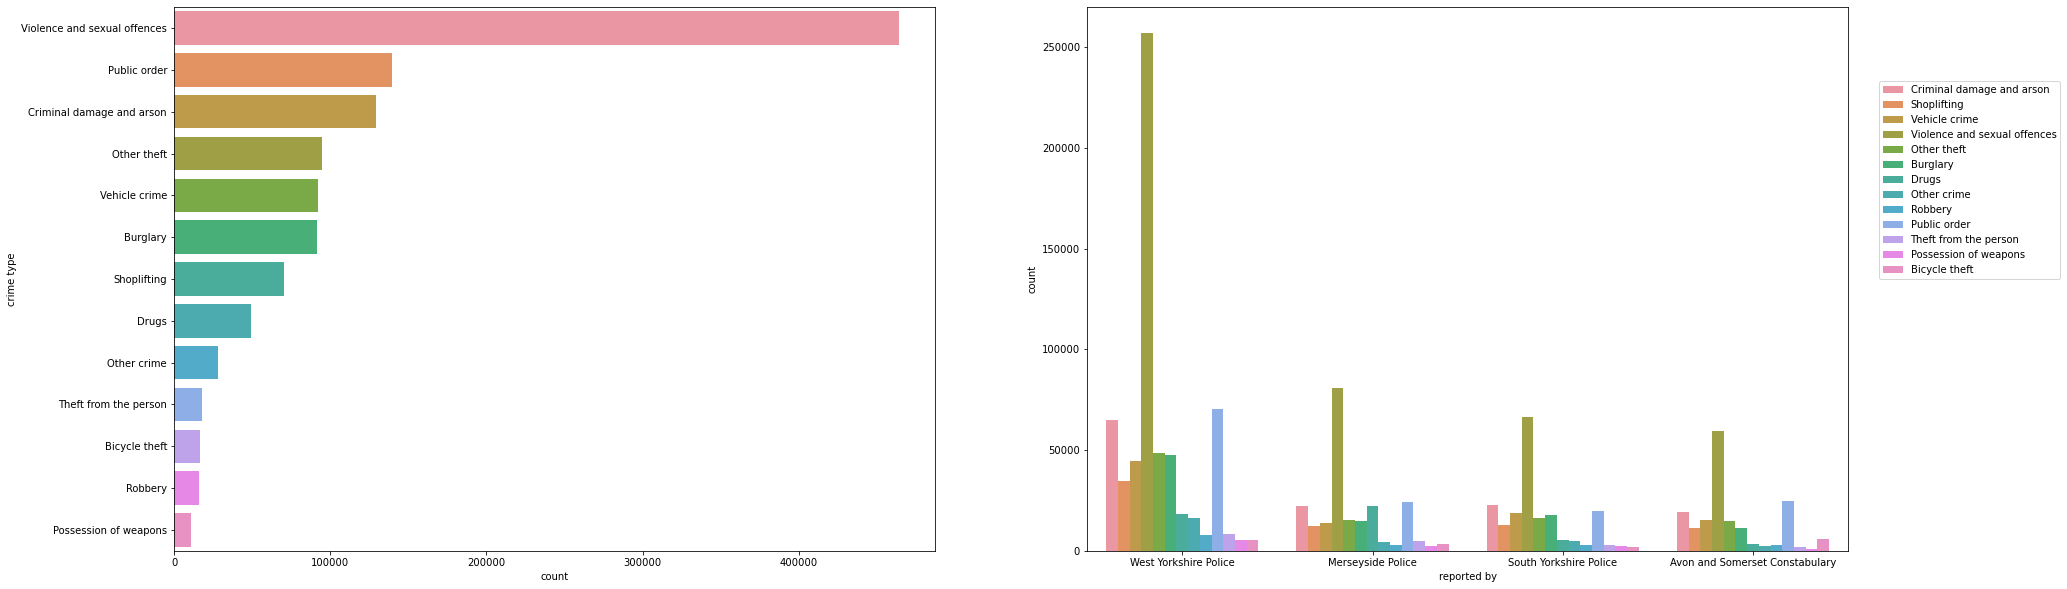

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(30,10))
sns.countplot(y='crime type', data=five_cities, order=five_cities['crime type'].value_counts().index, ax=axs[0])
m = sns.countplot(x='reported by', hue='crime type', data=five_cities, order = five_cities['reported by'].value_counts().index, ax=axs[1] )
m.legend(loc=(1.04,0.5))
plt.show()

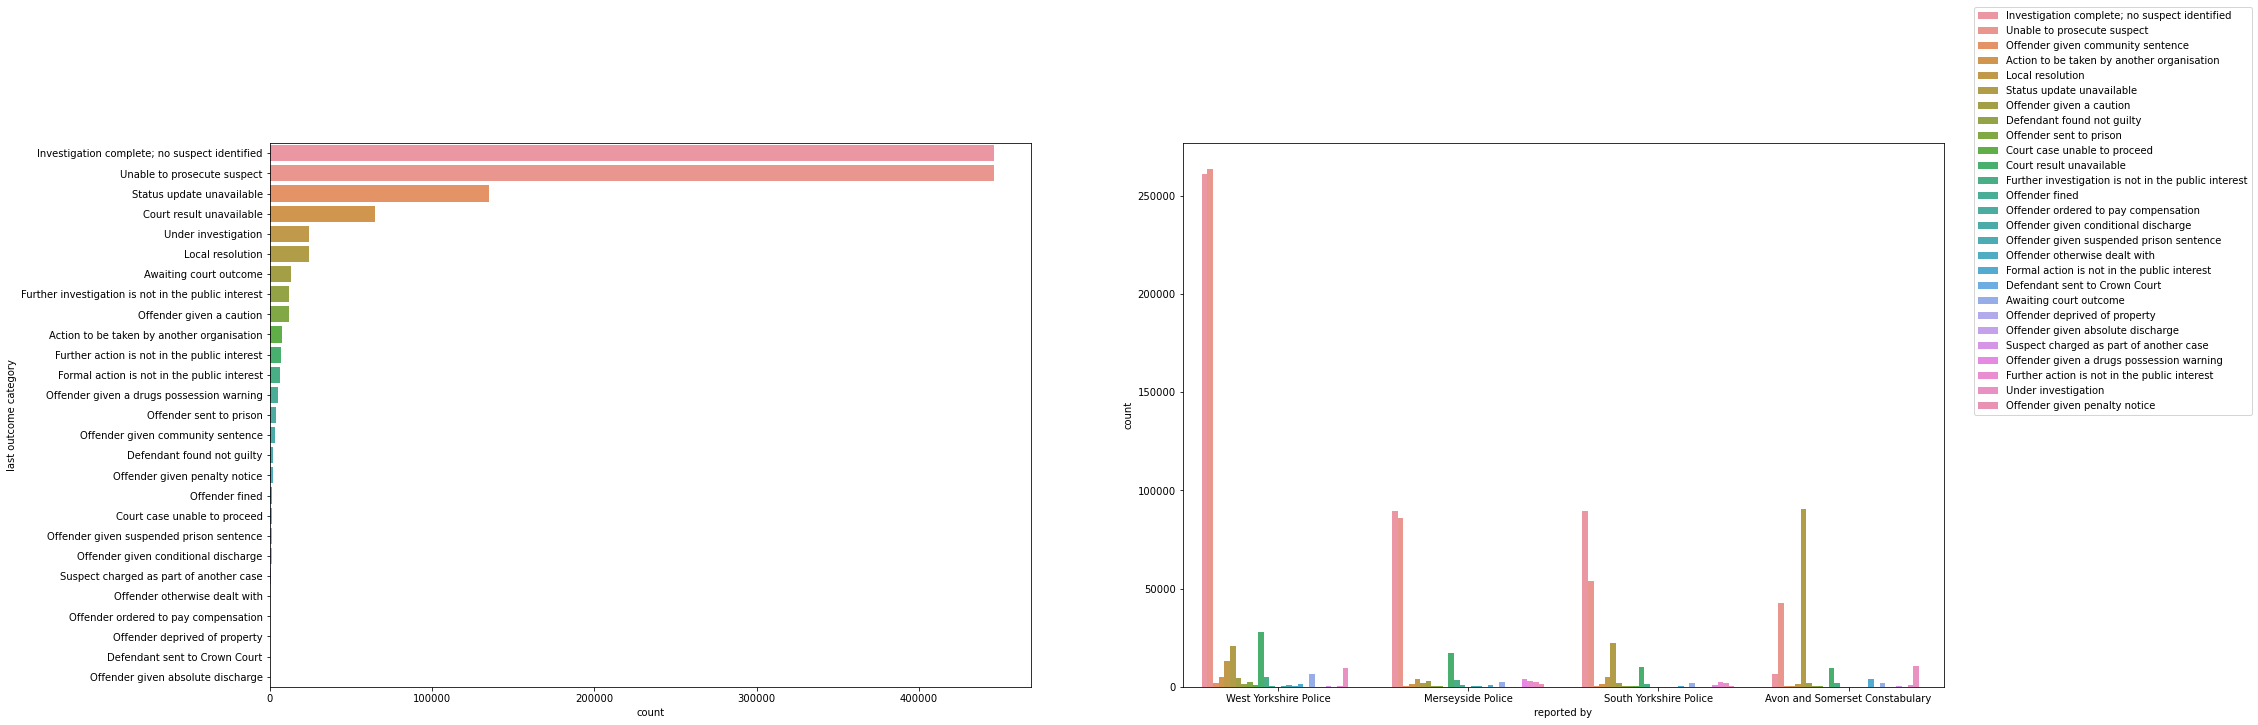

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(30,10))
sns.countplot(y='last outcome category', data=five_cities, order=five_cities['last outcome category'].value_counts().index, ax=axs[0])
m = sns.countplot(x='reported by', hue='last outcome category', data=five_cities, order = five_cities['reported by'].value_counts().index, ax=axs[1] )
m.legend(loc=(1.04,0.5))
plt.show()

### Numerical Columns Viz

In [40]:
five_cities.describe()

,longitude,latitude,lsoa code
count,1.220535e+06,1.220535e+06,1.220535e+06
mean,-1.988273e+00,5.333139e+01,1.014244e+06
std,5.759625e-01,7.865032e-01,8.898407e+03
min,-3.002089e+00,5.139996e+01,1.006512e+06
25%,-2.591272e+00,5.338264e+01,1.008098e+06
50%,-1.732999e+00,5.374436e+01,1.011322e+06
75%,-1.527028e+00,5.380211e+01,1.014542e+06
max,-1.306890e+00,5.394893e+01,1.033768e+06


In [41]:
columns_num = five_cities.describe().columns.tolist()  # numeric variables
columns_num

['longitude', 'latitude', 'lsoa code']

IndexError: index 2 is out of bounds for axis 0 with size 2

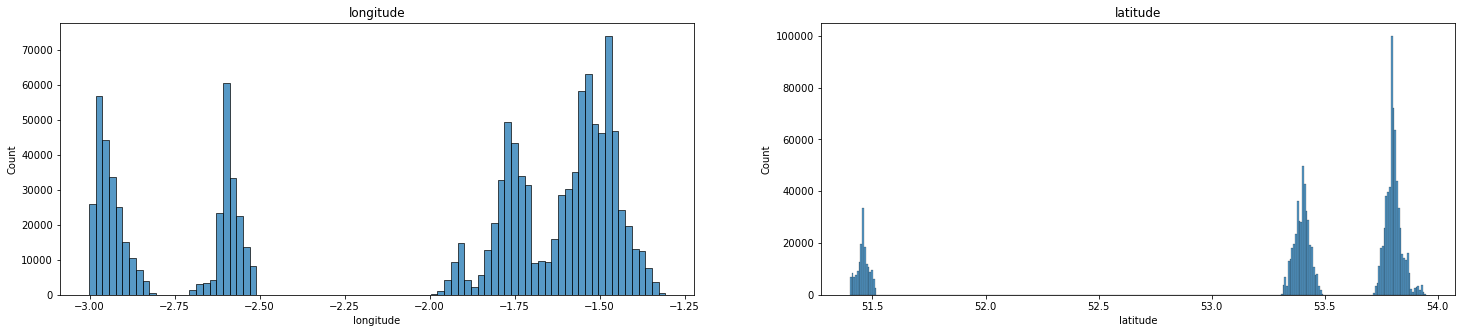

In [42]:
# Histograms
fig, axs = plt.subplots(1, 2, figsize=(25,5))
for i, _ in enumerate(columns_num):
    sns.histplot(data=five_cities[columns_num[i]], ax=axs[i])
    axs[i].set_title(columns_num[i])
plt.show()

IndexError: index 2 is out of bounds for axis 0 with size 2

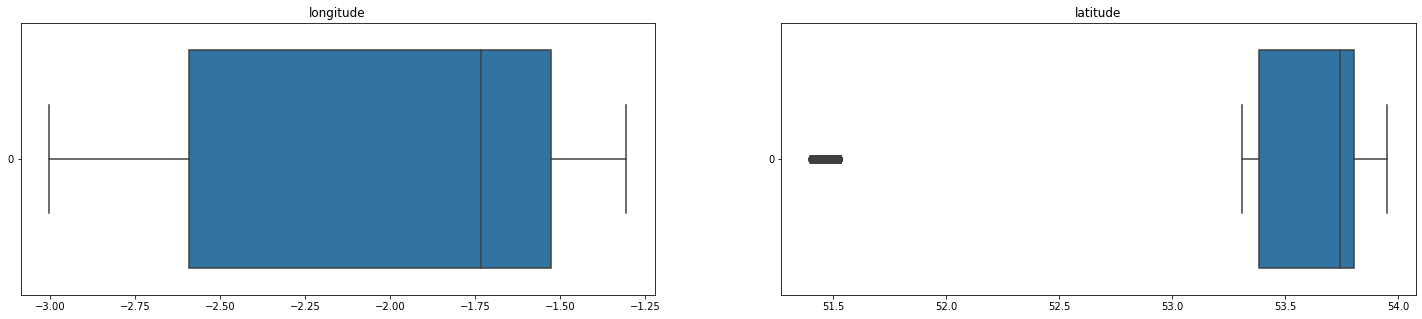

In [43]:
# Boxplots
fig, axs = plt.subplots(1, 2, figsize=(25,5))
for i, _ in enumerate(columns_num):
    sns.boxplot(data=five_cities[columns_num[i]], ax=axs[i], orient="h")
    axs[i].set_title(columns_num[i])
plt.show()

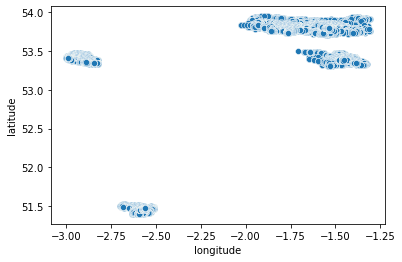

In [44]:
# Lat vs Long scatterplot
sns.scatterplot(data=five_cities, x="longitude", y="latitude")
plt.show()

### Crime type against time

In [45]:
# write observation here


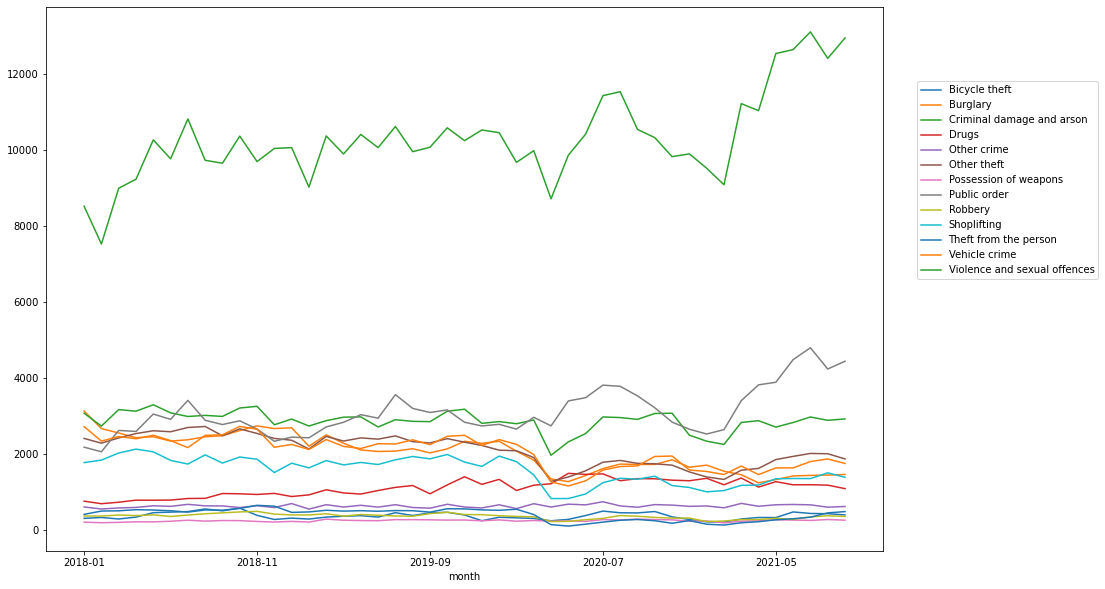

In [46]:
m = five_cities.groupby(['month', 'crime type']).size().unstack().plot.line(figsize=(15, 10))
m.legend(loc=(1.04,0.5))

### Last outcome category against time

In [47]:
# write observation here 

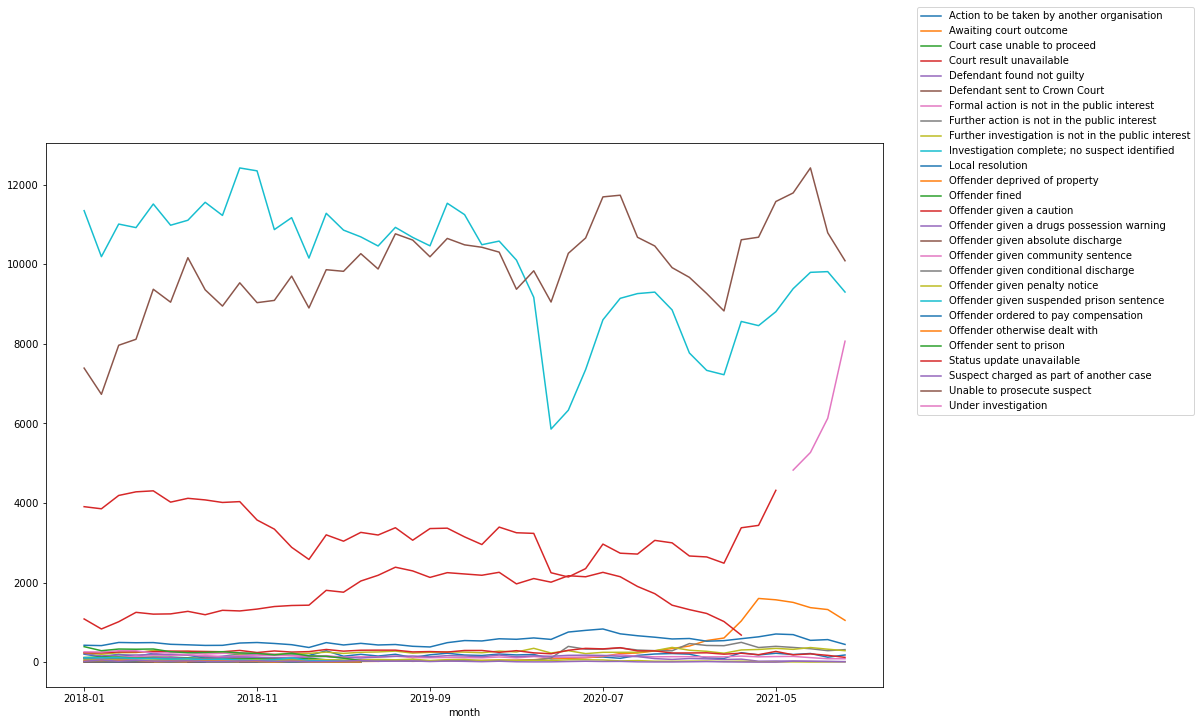

In [48]:
m = five_cities.groupby(['month', 'last outcome category']).size().unstack().plot.line(figsize=(15, 10))
m.legend(loc=(1.04,0.5))

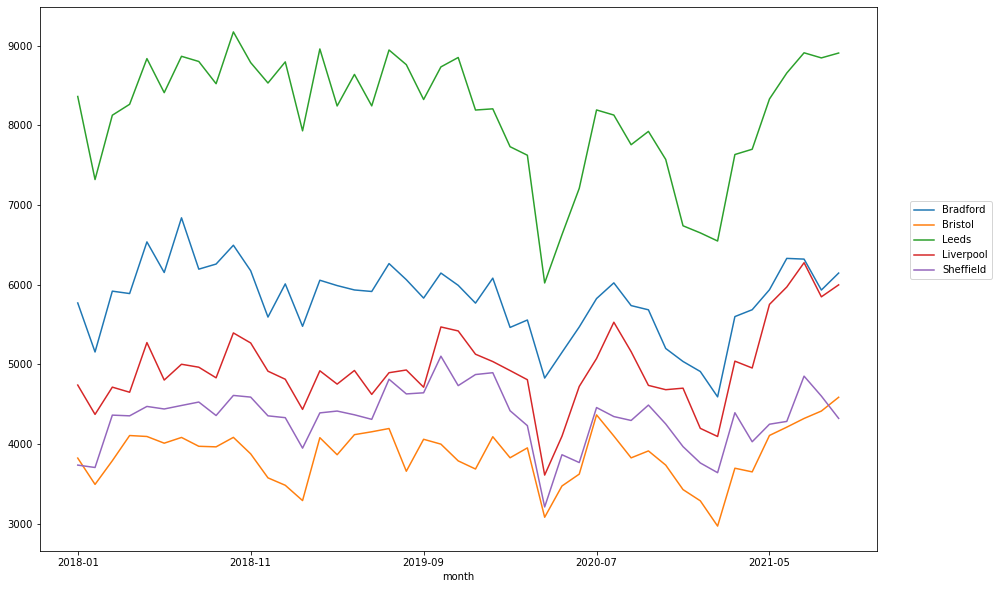

In [49]:
m = five_cities.groupby(['month', 'lsoa name']).size().unstack().plot.line(figsize=(15, 10))
m.legend(loc=(1.04,0.5))

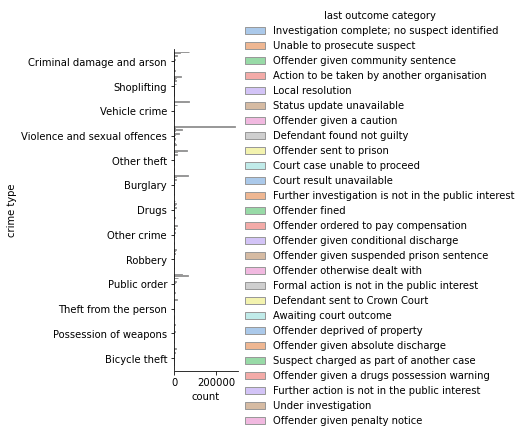

In [50]:
sns.catplot(y="crime type", hue="last outcome category", kind="count",palette="pastel", edgecolor=".6",data=five_cities)